<a href="https://colab.research.google.com/github/mansiraturi/FakeNewsDetection/blob/main/FakeNewsPreprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import string
import dask.dataframe as dd
from dask.multiprocessing import get
from nltk.stem import WordNetLemmatizer


In [ ]:
import matplotlib.pyplot as plt

# Preprocessing Data
import nltk
from nltk.tokenize import word_tokenize


#converting to vectors
from gensim.models import Word2Vec

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# model Validation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stopWords = stopwords.words('english')
stopWords.extend(['use', 're', 'edu', 'from', 'also'])

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
true.isnull().sum()

Dask Series Structure:
npartitions=1
date     int64
title      ...
dtype: int64
Dask Name: dataframe-sum-agg, 4 graph layers

In [ ]:
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
fake["txt"] = fake["title"]+ ' ' +fake["text"]
fake.head()

,title,text,subject,date,txt
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",Donald Trump Sends Out Embarrassing New Year’...
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",Drunk Bragging Trump Staffer Started Russian ...
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",Sheriff David Clarke Becomes An Internet Joke...
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",Trump Is So Obsessed He Even Has Obama’s Name...
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",Pope Francis Just Called Out Donald Trump Dur...


In [ ]:
true["txt"] = true["title"]+ ' '+ true["text"]
true.head()

,title,text,subject,date,txt
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...


In [ ]:
fake["class"]=0
true["class"]=1

In [ ]:
num_rows, num_columns = fake.compute().shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)

Number of rows: 23481
Number of columns: 6


In [ ]:
true.compute().shape

(21417, 6)

In [ ]:
fake_test = fake.tail(30)
fake = fake.loc[~fake.index.isin(range(23450, 23480))]

true_test = true.tail(30)
true = true.loc[~true.index.isin(range(21386, 21416))]

In [ ]:
news_df = dd.concat([true, fake], ignore_index=True)
news_df.head()

,title,text,subject,date,txt,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017","As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",Trump wants Postal Service to charge 'much mor...,1


In [ ]:
# news_df['txt'] = news_df['txt'].astype(str)

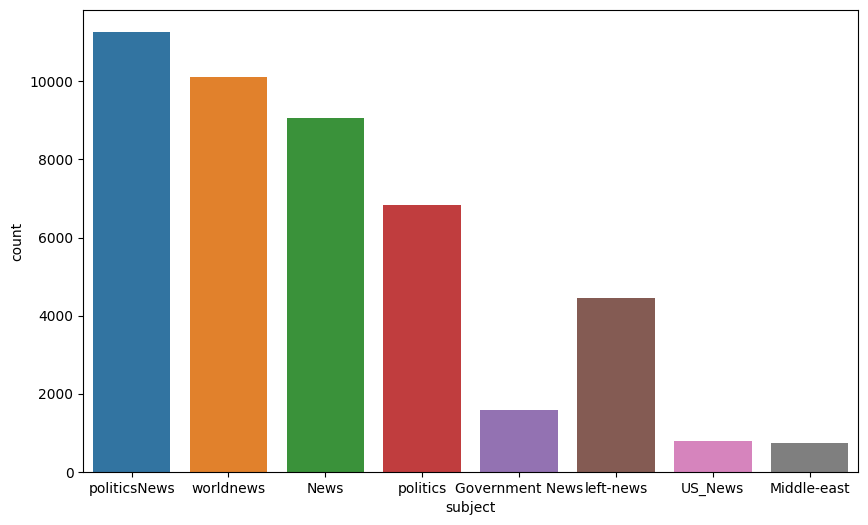

In [ ]:
news_df_pandas = news_df.compute()
plt.figure(figsize=(10, 6))
sns.countplot(x='subject', data=news_df_pandas, hue='subject')
plt.show()

In [ ]:
# Make a copy of the dataframe

In [ ]:
df = news_df.copy()
df = df.repartition(npartitions=30)
nocol = ['title', 'text', 'date', 'subject']
df = df.drop(columns=nocol)
df.head()

,txt,class
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1


In [ ]:
def clean_text(text):
    result = []
    # tokenize the words
    words = nltk.word_tokenize(text)
    #words = re.sub('[^a-zA-Z]', '', words)
    result = ' '.join([w for w in words if w not in stopWords and len(w) > 2])
    return result


In [ ]:
meta = ('txt', 'object')
df['txt'] = df['txt'].apply(clean_text, meta=meta)

In [ ]:
from dask.diagnostics import ProgressBar
with ProgressBar():
    df_res = df.head(5)
df_res


[########################################] | 100% Completed | 7.15 s


,txt,class
0,U.S. budget fight looms Republicans flip fisca...,1
1,U.S. military accept transgender recruits Mond...,1
2,Senior U.S. Republican senator 'Let Mr. Muelle...,1
3,FBI Russia probe helped Australian diplomat ti...,1
4,Trump wants Postal Service charge 'much Amazon...,1


In [ ]:
df_pandas = df['txt'].compute()
list_of_words = []
for i in df_pandas.txt:
  for j in i:
    list_of_words.append(j)

unique_words = len(list(set(list_of_words)))
unique_words

KeyboardInterrupt: 

In [ ]:
import pandas as pd
df_pandas = df.compute()
flat_list_of_words = [word for sublist in df_pandas['txt'].tolist() for word in sublist]
unique_words = len(set(flat_list_of_words))
print(unique_words)


In [ ]:
df2 = news_df.copy()

**Tokenization**

In [ ]:
# def token(para):
#   sentence = nltk.sent_tokenize(para)
#   words = nltk.word_tokenize(para)
#   return words

In [ ]:
# meta = ('txt', 'object')
# df['txt'] = df['txt'].apply(token, meta=meta)

In [ ]:
df.head(5)

,txt,class
0,U.S. budget fight looms Republicans flip fisca...,1
1,U.S. military accept transgender recruits Mond...,1
2,Senior U.S. Republican senator 'Let Mr. Muelle...,1
3,FBI Russia probe helped Australian diplomat ti...,1
4,Trump wants Postal Service charge 'much Amazon...,1


**Stemming**

In [ ]:
# stemmer = PorterStemmer()
# def stemming(word_list):
#     #text = ' '.join(word_list)
#     # replace non-alphabetic characters with space
#     #text = re.sub('[^a-zA-Z]', '', text)
#     # convert to lower case and tokenize words
#     words = text.lower().split()
#     stemmed_words = [stemmer.stem(w) for w in words]
#     content = ' '.join(stemmed_words)
#     return content

# meta = ('txt', 'object')
# df['news'] = df['txt'].apply(stemming, meta=meta)


In [ ]:
stemmer = PorterStemmer()

def stemming(text):
    # Remove punctuations
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)

    # Replace certain patterns
    text = re.sub(r'\bU\.S\.\b', 'usa', text, flags=re.IGNORECASE)
    # Remove special characters
    text = re.sub(r'[^A-Za-z\s]', '', text)

    # Tokenize the words
    words = word_tokenize(text)
    # Convert each word to lowercase
    words = [stemmer.stem(w) for w in words]
    # Remove stopwords and words with length less than 3
    result = ' '.join([w for w in words if len(w) > 2])

    return result

meta = ('txt', 'object')
df['stem'] = df['txt'].apply(stemming, meta=meta)

from dask.diagnostics import ProgressBar
with ProgressBar():
    res = df.head(5)
res

[########################################] | 100% Completed | 18.20 s


,txt,class,stem
0,U.S. budget fight looms Republicans flip fisca...,1,budget fight loom republican flip fiscal scrip...
1,U.S. military accept transgender recruits Mond...,1,militari accept transgend recruit monday penta...
2,Senior U.S. Republican senator 'Let Mr. Muelle...,1,senior republican senat let mueller job washin...
3,FBI Russia probe helped Australian diplomat ti...,1,fbi russia probe help australian diplomat tipo...
4,Trump wants Postal Service charge 'much Amazon...,1,trump want postal servic charg much amazon shi...


**Lemmatization**

In [ ]:
# # Instantiate the lemmatizer
# lemmatizer = WordNetLemmatizer()

# def lemmatize_text(text):
#     #text = re.sub('[^a-zA-Z]', ' ', text)
#     #words = text.split()
#     # Lemmatize the words
#     lemmatized_words = [lemmatizer.lemmatize(w) for w in text]
#     # Join the lemmatized words back into a string
#     lemmatized_text = ' '.join(lemmatized_words)
#     return lemmatized_text


In [ ]:
from nltk.tokenize.treebank import TreebankWordDetokenizer
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    # Tokenize the words
    words = nltk.word_tokenize(text)
    # Lemmatize each word
    lemmatized_words = [lemmatizer.lemmatize(w) for w in words]
    # Detokenize the lemmatized words
    result = TreebankWordDetokenizer().detokenize(lemmatized_words)
    return result

meta = ('txt', 'object')
df['lemmatized'] = df['stem'].apply(lemmatize, meta=meta)

from dask.diagnostics import ProgressBar
with ProgressBar():
    res = df.head(5)
res


[########################################] | 100% Completed | 24.80 s


,txt,class,stem,lemmatized
0,U.S. budget fight looms Republicans flip fisca...,1,budget fight loom republican flip fiscal scrip...,budget fight loom republican flip fiscal scrip...
1,U.S. military accept transgender recruits Mond...,1,militari accept transgend recruit monday penta...,militari accept transgend recruit monday penta...
2,Senior U.S. Republican senator 'Let Mr. Muelle...,1,senior republican senat let mueller job washin...,senior republican senat let mueller job washin...
3,FBI Russia probe helped Australian diplomat ti...,1,fbi russia probe help australian diplomat tipo...,fbi russia probe help australian diplomat tipo...
4,Trump wants Postal Service charge 'much Amazon...,1,trump want postal servic charg much amazon shi...,trump want postal servic charg much amazon shi...


Converting words to vectors=> Word2Vec used here as they store semantic information

In [ ]:
final_df = df.copy()
cols=['txt', 'stem']
final_df = final_df.drop(columns = cols)
final_df= final_df.rename(columns={'lemmatized': 'news'})
final_df.head()

,class,news
0,1,budget fight loom republican flip fiscal scrip...
1,1,militari accept transgend recruit monday penta...
2,1,senior republican senat let mueller job washin...
3,1,fbi russia probe help australian diplomat tipo...
4,1,trump want postal servic charg much amazon shi...


In [ ]:
order = ['news', 'class']
final_df = final_df[order]
final_df.head()

,news,class
0,budget fight loom republican flip fiscal scrip...,1
1,militari accept transgend recruit monday penta...,1
2,senior republican senat let mueller job washin...,1
3,fbi russia probe help australian diplomat tipo...,1
4,trump want postal servic charg much amazon shi...,1


In [ ]:
# Specify the file path within your Google Drive
csv_file_path = '/content/drive/MyDrive/preNews.csv'

# Save the Dask DataFrame to a CSV file
with ProgressBar():
  final_df.to_csv(csv_file_path, index=False, single_file=True)

[########################################] | 100% Completed | 12m 9s


In [ ]:
#divide into train and test set
X = final_df.drop("class", axis=1)
y = final_df["class"]

In [ ]:

sample= df.loc[0:5].copy()
sample.head()

,txt,class,stem,lemmatized
0,U.S. budget fight looms Republicans flip fisca...,1,budget fight loom republican flip fiscal scrip...,budget fight loom republican flip fiscal scrip...
1,U.S. military accept transgender recruits Mond...,1,militari accept transgend recruit monday penta...,militari accept transgend recruit monday penta...
2,Senior U.S. Republican senator 'Let Mr. Muelle...,1,senior republican senat mueller washington reu...,senior republican senat mueller washington reu...
3,FBI Russia probe helped Australian diplomat ti...,1,russia probe help australian diplomat tipoff w...,russia probe help australian diplomat tipoff w...
4,Trump wants Postal Service charge 'much Amazon...,1,trump want postal servic charg much amazon shi...,trump want postal servic charg much amazon shi...


In [ ]:
#vectorizing x as raw data can't be used directly to perform calculations so we convert textual data to numeric data
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization= TfidfVectorizer()
#Tfidf- term frequency/inverse document frequency: counts the frequency of a word in a file
xv_train=vectorization.fit_transform(x_train)  #converting text to feature vector
xv_test=vectorization.transform(x_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MB=MultinomialNB()
MB.fit(xv_train, y_train)
pred_MB = MB.predict(xv_test)
MB_acc=MB.score(xv_test, y_test)
print(classification_report(y_test, pred_MB))

In [ ]:
print(sample.index.name)

None


In [ ]:
import dask.array as da

vectorizer = TfidfVectorizer()
with ProgressBar():
    tfidf_matrix = dd.compute(vectorizer.fit_transform(sample['lemmatized']))[0]

# Convert the TF-IDF matrix to a Dask DataFrame
dense_tfidf_array = da.from_array(tfidf_matrix.toarray(), chunks=tfidf_matrix.shape)
tfidf_df = dd.from_dask_array(dense_tfidf_array, columns=vectorizer.get_feature_names_out())


[########################################] | 100% Completed | 28.67 s
[########################################] | 100% Completed | 20.70 s
[########################################] | 100% Completed | 21.99 s
[########################################] | 100% Completed | 21.11 s
[########################################] | 100% Completed | 23.52 s
[########################################] | 100% Completed | 26.75 s
[########################################] | 100% Completed | 22.52 s
[########################################] | 100% Completed | 21.86 s
[########################################] | 100% Completed | 20.25 s
[########################################] | 100% Completed | 17.82 s
[########################################] | 100% Completed | 26.01 s
[########################################] | 100% Completed | 19.96 s
[########################################] | 100% Completed | 20.67 s
[########################################] | 100% Completed | 18.94 s
[###################

ValueError: Unable to concatenate DataFrame with unknown division specifying axis=1

In [ ]:
# sample = sample.reset_index(drop=True)
# tfidf_df = tfidf_df.reset_index(drop=True)

# # Concatenate the TF-IDF DataFrame with the original DataFrame
# result_df = dd.concat([sample, tfidf_df], axis=1)

# Display the resulting Dask DataFrame
with ProgressBar():
    print(tfidf_df.head())


[########################################] | 100% Completed | 104.09 ms
     117590      2014      2015      2016  2016happi  2016thi      2017  \
0  0.000000  0.000000  0.000000  0.000000        0.0      0.0  0.000000   
1  0.000000  0.000000  0.000000  0.000000        0.0      0.0  0.025801   
2  0.000000  0.000000  0.000000  0.035424        0.0      0.0  0.000000   
3  0.000000  0.000000  0.000000  0.084937        0.0      0.0  0.000000   
4  0.024724  0.024724  0.024724  0.016835        0.0      0.0  0.018756   

   2017after  2017are  2017do  ...  wrap  wrest  wrong     wrote  yaver  \
0        0.0      0.0     0.0  ...   0.0    0.0    0.0  0.000000    0.0   
1        0.0      0.0     0.0  ...   0.0    0.0    0.0  0.000000    0.0   
2        0.0      0.0     0.0  ...   0.0    0.0    0.0  0.000000    0.0   
3        0.0      0.0     0.0  ...   0.0    0.0    0.0  0.000000    0.0   
4        0.0      0.0     0.0  ...   0.0    0.0    0.0  0.021233    0.0   

       year   yearend  yea

In [ ]:
print(xv_train.toarray())

[[0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


In [ ]:

import dask.array as da

vectorizer = TfidfVectorizer()
with ProgressBar():
    tfidf_matrix = dd.compute(vectorizer.fit_transform(final_df['news']))[0]

# Convert the TF-IDF matrix to a Dask DataFrame
dense_tfidf_array = da.from_array(tfidf_matrix.toarray(), chunks=tfidf_matrix.shape)
tfidf_df = dd.from_dask_array(dense_tfidf_array, columns=vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original DataFrame
result_df = dd.concat([final_df, tfidf_df], axis=1)

# Display the resulting Dask DataFrame
with ProgressBar():
    print(result_df.head())

In [ ]:
import dask.array as da

vectorizer = TfidfVectorizer()
with ProgressBar():
    tfidf_matrix = dd.compute(vectorizer.fit_transform(final_df['news']))[0]

# Convert the TF-IDF matrix to a Dask DataFrame
dense_tfidf_array = da.from_array(tfidf_matrix.toarray(), chunks=tfidf_matrix.shape)
tfidf_df = dd.from_dask_array(dense_tfidf_array, columns=vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original DataFrame
result_df = dd.concat([final_df, tfidf_df], axis=1)

# Display the resulting Dask DataFrame
with ProgressBar():
    print(result_df.head())

[########################################] | 100% Completed | 25.70 s
[########################################] | 100% Completed | 19.86 s
[########################################] | 100% Completed | 22.87 s
[########################################] | 100% Completed | 21.94 s
[########################################] | 100% Completed | 22.72 s
[########################################] | 100% Completed | 23.46 s
[########################################] | 100% Completed | 22.29 s
[########################################] | 100% Completed | 22.59 s
[########################################] | 100% Completed | 20.02 s
[########################################] | 100% Completed | 17.89 s
[########################################] | 100% Completed | 18.47 s
[########################################] | 100% Completed | 17.62 s
[########################################] | 100% Completed | 20.07 s
[########################################] | 100% Completed | 18.22 s
[###################

In [ ]:
X.head(4)

In [ ]:
# with ProgressBar():
#     tf_df = X.compute()

[########################################] | 100% Completed | 12m 6s


In [ ]:
# Perform TF-IDF on the 'text' column using sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(tf_df['news'])

# Convert the TF-IDF matrix to a Pandas DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Concatenate the TF-IDF DataFrame with the original Pandas DataFrame
result_df = pd.concat([tf_df, tfidf_df], axis=1)

# Display the result
print(result_df.head(5))

NameError: name 'tf_df' is not defined

In [ ]:
def token(para):
  sentence = nltk.sent_tokenize(para)
  words = nltk.word_tokenize(para)
  return words
meta = ('news', 'object')
X_token = final_df['news'].apply(token, meta=meta)
with ProgressBar():
    res = X_token.head(5)
res

[########################################] | 100% Completed | 24.86 s


0    [budget, fight, loom, republican, flip, fiscal...
1    [militari, accept, transgend, recruit, monday,...
2    [senior, republican, senat, mueller, washingto...
3    [russia, probe, help, australian, diplomat, ti...
4    [trump, want, postal, servic, charg, much, ama...
Name: news, dtype: object

In [ ]:
is_dask = dd.core.is_dask_collection(X_token)
print(is_dask)

True


In [ ]:
X_token_pd = X_token.compute()

@dask.delayed
def train_word2vec(data):
    model = Word2Vec(sentences=data, vector_size=100, window=5, min_count=3, workers=2, epochs=10)
    return model

# Create a list of delayed tasks
tasks = [train_word2vec(chunk) for chunk in np.array_split(X_token_pd, 10)]  # Split into chunks for parallel processing

# Compute the delayed tasks
models = dask.compute(*tasks)

# Combine the models if needed (e.g., average embeddings)
final_model = sum(models) / len(models)

with ProgressBar():
    print(final_model.head())

KeyboardInterrupt: 

In [ ]:
model = Word2Vec(sentences=X_token, vector_size=100, window=5, min_count=3, workers=2, epochs=10)

# Get word vectors using Gensim
word_vectors_gensim = {word: model.wv[word].tolist() for word in model.wv.index_to_key}

for word, vector in list(word_vectors_gensim.items())[:5]:
    print(f'{word}: {vector}')

KeyboardInterrupt: 

In [ ]:
import pandas as pd

# Convert word_vectors_gensim dictionary to DataFrame
df_word_vectors = pd.DataFrame.from_dict(word_vectors_gensim, orient='index', columns=[f'dim_{i+1}' for i in range(100)])

# Display the DataFrame with word vectors
print(df_word_vectors)


In [ ]:
 #to remove special characters
def cleantext(text):
    text=text.lower()
    text=re.sub( '\[.*?\]', '', text)
    text=re.sub("\\W", " ", text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text=re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text=re.sub('\n', '', text)
    text=re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
test["txt"]=test["txt"].apply(word_drop)
df["txt"]=df["txt"].apply(word_drop)

In [ ]:
pip install spacy

In [ ]:
X = df.drop("label", axis=1)
y = df["label"]

In [ ]:
X

,id,title,author,text,txt
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,house dem aide we didn t even see comey s le...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,flynn hillary clinton big woman on campus ...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",why the truth might get you firedwhy the truth...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,civilian kill in single us airstrike have be...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,iranian woman jail for fictional unpublished s...
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,rapper t I trump a poster child for white...
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,n f l playoff schedule matchup and odd ...
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,macy s be say to receive takeover approach by ...
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",nato russia to hold parallel exercise in bal...


In [ ]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [ ]:
X_test = test

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorization= TfidfVectorizer()
#Tfidf- term frequency/inverse document frequency: counts the frequency of a word in a file
xv_train=vectorization.fit_transform(X)  #converting text to feature vector
xv_test=vectorization.transform(X_test)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize

# Tokenize the text data for Word2Vec
tokenized_X_train = [word_tokenize(text) for text in X]
tokenized_X_test = [word_tokenize(text) for text in X_test]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_X_train, vector_size=100, window=5, min_count=1, workers=4)

# Function to calculate the average word vectors for a document
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

# Create average word vectors for training and testing sets
train_wordvec_arrays = np.zeros((len(tokenized_X_train), 100))
test_wordvec_arrays = np.zeros((len(tokenized_X_test), 100))

for i in range(len(tokenized_X_train)):
    train_wordvec_arrays[i] = average_word_vectors(tokenized_X_train[i], model=word2vec_model, vocabulary=word2vec_model.wv.index_to_key, num_features=100)

for i in range(len(tokenized_X_test)):
    test_wordvec_arrays[i] = average_word_vectors(tokenized_X_test[i], model=word2vec_model, vocabulary=word2vec_model.wv.index_to_key, num_features=100)


In [ ]:
X = df["txt"]
y = df["label"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(X_train)
xv_test = vectorization.transform(X_test)



In [ ]:
print(xv_train.shape)
print(y_train.shape)


(16640, 146494)
(16640,)


In [ ]:
xv_train

<16640x146494 sparse matrix of type '<class 'numpy.float64'>'
	with 4924830 stored elements in Compressed Sparse Row format>

In [ ]:
xv_train_dense = xv_train.toarray()

# Build LSTM model
embedding_dim = 100
model = Sequential()
model.add(Embedding(input_dim=xv_train_dense.shape[1], output_dim=embedding_dim, input_length=xv_train_dense.shape[1]))
model.add(LSTM(units=100))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(xv_train_dense, y_train, epochs=5, batch_size=64)


In [ ]:
print(txt)

In [ ]:
x=df["text"]
y=df["class"]